In [1]:
import pandas as pd

## Step 2: Read the daily confirmed cases and deaths into two dataframes

In [2]:
urlfile_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

urlfile_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

df_confirmed =  pd.read_csv(urlfile_confirmed)
df_deaths =  pd.read_csv(urlfile_deaths)

In [3]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178352,178373,178387,178418,178457,178513,178574,178611,178638,178648
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274376,274429,274462,274504,274520,274535,274606,274606,274737,274791
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265733,265738,265739,265739,265741,265746,265746,265754,265761,265761
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,40709,40709,40709,40709,40709,40709,41013,41013,41013,41013
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99287,99287,99287,99287,99287


In [4]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7676,7676,7676,7678,7679,7680,7680,7680,7680,7681
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3495,3495,3496,3496,3496,3496,3496,3496,3496,3496
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [5]:
print(df_confirmed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 827 entries, Province/State to 4/23/22
dtypes: float64(2), int64(823), object(2)
memory usage: 1.8+ MB
None


## Step 3: Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level

### a) Finding aggregate sum of confirmed cases for all date columns and excluding Province, Country, Latitude, Longitude

#### Pandas Indexing

* Dataframe.[ ] ; This function also known as indexing operator
* Dataframe.loc[ ] : This function is used for labels.
* Dataframe.iloc[ ] : This function is used for positions or integer based
* Dataframe.ix[] : This function is used for both label and integer based

In [6]:
#finding the aggregate sum of confirmed cases on a global level
df_confirmed.agg([sum])

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22
sum,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,5669.995846,6192.358524,557,657,944,1437,2120,2929,5580,...,502932802,503645731,504198041,504619899,505089291,506082451,507046645,507947338,508708884,509196481


In [7]:
# Select column 3 to 826 (index 4-827) and find sum
df_confirmed['Sum']=df_confirmed.iloc[:,4:827].sum(axis=1)
print(df_confirmed.head(10))

                 Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN           Antarctica -71.94990   23.347000   
6                           NaN  Antigua and Barbuda  17.06080  -61.796400   
7                           NaN            Argentina -38.41610  -63.616700   
8                           NaN              Armenia  40.06910   45.038200   
9  Australian Capital Territory            Australia -35.47350  149.012400   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/15/22  \
0        0        0        0        0        0        0  ...   17837

In [8]:
#Finding sum of all values in the sum column to get total confirmed cases globally
total_confirmed_cases = df_confirmed['Sum'].sum()
print("Total Confirmed Cases = ", total_confirmed_cases)

Total Confirmed Cases =  122488414675


### b) Finding aggregate sum of deaths for all date columns and excluding Province, Country, Latitude, Longitude

In [9]:
# Select column 3 to 826 (index 4-827) and find sum
df_deaths['Sum']=df_deaths.iloc[:,4:827].sum(axis=1)
print(df_deaths.head(10))

                 Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN           Antarctica -71.94990   23.347000   
6                           NaN  Antigua and Barbuda  17.06080  -61.796400   
7                           NaN            Argentina -38.41610  -63.616700   
8                           NaN              Armenia  40.06910   45.038200   
9  Australian Capital Territory            Australia -35.47350  149.012400   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/15/22  \
0        0        0        0        0        0        0  ...     767

In [10]:
#Finding sum of all values in the sum column to get total confirmed cases globally
total_deaths = df_deaths['Sum'].sum()
print("Total Deaths = ", total_deaths)

Total Deaths =  2305321414


In [11]:
#transposing the confirmed table, to have date as the index
df_confirmed_transpose = df_confirmed.T
df_confirmed_transpose.head()

df_confirmed_transpose_reduced = df_confirmed_transpose.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis='rows')
df_confirmed_transpose_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [12]:
df_confirmed_transpose_reduced_in = df_confirmed_transpose_reduced.reset_index(inplace=False)
df_confirmed_transpose_reduced_in.head()
#df_confirmed_transpose_reduced_in['Date']

,index,0,1,2,3,4,5,6,7,8,...,274,275,276,277,278,279,280,281,282,283
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [13]:
df_confirmed_transpose_reduced_in.index

RangeIndex(start=0, stop=824, step=1)

In [14]:
#concatenating the index(date), sum of confirmed cases and deaths
aggregate_df = pd.concat([df_confirmed_transpose_reduced_in['index'], df_confirmed['Sum'], df_deaths['Sum']], axis=1)
aggregate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   824 non-null    object 
 1   Sum     284 non-null    float64
 2   Sum     284 non-null    float64
dtypes: float64(2), object(1)
memory usage: 19.4+ KB


In [15]:
#renaming the columns
columns = ['calendar_date', 'sum_confirmed', 'sum_deaths']
aggregate_df.columns = columns
aggregate_df

,calendar_date,sum_confirmed,sum_deaths
0,1/22/20,67281564.0,2927857.0
1,1/23/20,84307439.0,1345130.0
2,1/24/20,96555320.0,2700114.0
3,1/25/20,9884665.0,76960.0
4,1/26/20,27120419.0,618594.0
...,...,...,...
819,4/20/22,NaN,NaN
820,4/21/22,NaN,NaN
821,4/22/22,NaN,NaN
822,4/23/22,NaN,NaN


#### Cleaning the Data
1. Dropping rows with empty cells

In [16]:
aggregate_df_clean = aggregate_df.dropna()
aggregate_df_clean.reset_index(drop=True, inplace=True)
aggregate_df_clean.head()

,calendar_date,sum_confirmed,sum_deaths
0,1/22/20,67281564.0,2927857.0
1,1/23/20,84307439.0,1345130.0
2,1/24/20,96555320.0,2700114.0
3,1/25/20,9884665.0,76960.0
4,1/26/20,27120419.0,618594.0


### Step 4: Research stock for the 5 industries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://pypi.org/project/alpha-vantage/

In [18]:
from alpha_vantage.timeseries import TimeSeries 

In [19]:
#store the API key
ts = TimeSeries(key='DAXRSK4WN54W5H09', output_format='pandas')

### Getting the stock data

In [20]:
#symbol - the ticker of the stock

List of tickers for stock selected
Juliet

* Overall American Market - AEM Agnico Eagle Mines Ltd
* Overall Canadian Market 
* Travel sector - TZOO Travelzoo
* The Real Estate sector - BAM Brookfield Asset Management Inc - Class A
* Precious metals (Gold, Silver, Platinum, etc) - AEM Agnico Eagle Mines Ltd

Diana

* american company:  AAPL - apple
* canadina company: SHOP.TRT - shopify
* precious metals - GFI  - Gold Fields Ltd
* real estate : CIGI - Colliers International Group Stock
* travel sector : BKNG -  Booking Holdings Inc

In [21]:
#getting the stock data
data_apple, meta_apple = ts.get_intraday('AAPL', interval="1min", outputsize="full")

In [22]:
#to replace***
#getting the stock data
#data_shopify, meta_shopify = ts.get_intraday('GS.TO', interval="1min", outputsize="full")

In [23]:
#getting the stock data
data_gold, meta_gold = ts.get_intraday('GFI', interval="1min", outputsize="full")

In [24]:
#getting the stock data
data_colliers, meta_colliers = ts.get_intraday('CIGI', interval="1min", outputsize="full")

In [25]:
#getting the stock data
data_booking, meta_booking = ts.get_intraday('BKNG', interval="1min", outputsize="full")

### Examining the stock data

In [26]:
#Examine data
meta_apple

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2022-04-22 20:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [27]:
data_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7087 entries, 2022-04-22 20:00:00 to 2022-04-11 04:01:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    7087 non-null   float64
 1   2. high    7087 non-null   float64
 2   3. low     7087 non-null   float64
 3   4. close   7087 non-null   float64
 4   5. volume  7087 non-null   float64
dtypes: float64(5)
memory usage: 332.2 KB


In [28]:
data_apple.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-22 20:00:00,161.52,161.52,161.40,161.50,1893.0
2022-04-22 19:59:00,161.50,161.50,161.40,161.50,3928.0
2022-04-22 19:58:00,161.50,161.50,161.50,161.50,794.0
2022-04-22 19:57:00,161.50,161.50,161.49,161.49,1758.0
2022-04-22 19:55:00,161.47,161.48,161.46,161.46,1413.0


### Step 5: Use AlphaVantage (the stock API used earlier in the course) to get the daily high and low prices for your selected stocks

In [29]:
#renaming the columns
columns = ['open', 'high', 'low', 'close', 'volume']
data_apple.columns = columns

In [30]:
data_apple['TradeDate'] = data_apple.index.date
data_apple['time'] = data_apple.index.time

In [31]:
data_apple.head

<bound method NDFrame.head of                        open    high     low   close  volume   TradeDate  \
date                                                                      
2022-04-22 20:00:00  161.52  161.52  161.40  161.50  1893.0  2022-04-22   
2022-04-22 19:59:00  161.50  161.50  161.40  161.50  3928.0  2022-04-22   
2022-04-22 19:58:00  161.50  161.50  161.50  161.50   794.0  2022-04-22   
2022-04-22 19:57:00  161.50  161.50  161.49  161.49  1758.0  2022-04-22   
2022-04-22 19:55:00  161.47  161.48  161.46  161.46  1413.0  2022-04-22   
...                     ...     ...     ...     ...     ...         ...   
2022-04-11 04:05:00  168.92  168.93  168.92  168.93  1316.0  2022-04-11   
2022-04-11 04:04:00  168.81  168.89  168.80  168.80  4075.0  2022-04-11   
2022-04-11 04:03:00  168.81  168.94  168.80  168.94  1170.0  2022-04-11   
2022-04-11 04:02:00  169.00  169.00  168.85  168.85  1675.0  2022-04-11   
2022-04-11 04:01:00  168.99  169.81  168.99  169.00  7170.0  2022-04-1

In [32]:
#limiting the data to working hours trading
market_apple = data_apple.between_time('09:30:00', '16:00:00').copy()
market_apple.sort_index(inplace=True)
market_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3519 entries, 2022-04-11 09:30:00 to 2022-04-22 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3519 non-null   float64
 1   high       3519 non-null   float64
 2   low        3519 non-null   float64
 3   close      3519 non-null   float64
 4   volume     3519 non-null   float64
 5   TradeDate  3519 non-null   object 
 6   time       3519 non-null   object 
dtypes: float64(5), object(2)
memory usage: 219.9+ KB


In [33]:
market_apple.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2022-04-11,165.50,169.0300
2022-04-12,166.64,169.8700
2022-04-13,166.77,171.0400
2022-04-14,165.04,171.2700
2022-04-18,163.57,166.5984
2022-04-19,163.91,167.8200
2022-04-20,166.10,168.9800
2022-04-21,165.91,171.5300
2022-04-22,161.50,167.8699


In [34]:
#print(market_apple)
market_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3519 entries, 2022-04-11 09:30:00 to 2022-04-22 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3519 non-null   float64
 1   high       3519 non-null   float64
 2   low        3519 non-null   float64
 3   close      3519 non-null   float64
 4   volume     3519 non-null   float64
 5   TradeDate  3519 non-null   object 
 6   time       3519 non-null   object 
dtypes: float64(5), object(2)
memory usage: 219.9+ KB


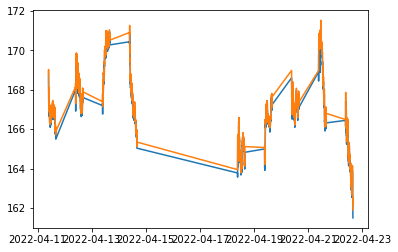

In [35]:
plt.plot(market_apple[["low", "high"]])

#### Combining the COVID confirmed cases and deaths from *aggregate_df*

In [37]:
#concatenating the sum of confirmed cases and deaths, low and high for apple
aggregate_apple_df = pd.concat([aggregate_df, market_apple[["low", "high"]]], axis=1)
aggregate_apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 2022-04-22 16:00:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   calendar_date  824 non-null    object 
 1   sum_confirmed  284 non-null    float64
 2   sum_deaths     284 non-null    float64
 3   low            3519 non-null   float64
 4   high           3519 non-null   float64
dtypes: float64(4), object(1)
memory usage: 203.6+ KB


In [38]:
aggregate_apple_df.head()

,calendar_date,sum_confirmed,sum_deaths,low,high
0,1/22/20,67281564.0,2927857.0,NaN,NaN
1,1/23/20,84307439.0,1345130.0,NaN,NaN
2,1/24/20,96555320.0,2700114.0,NaN,NaN
3,1/25/20,9884665.0,76960.0,NaN,NaN
4,1/26/20,27120419.0,618594.0,NaN,NaN


In [40]:
#cleaning the data - dropping rows with empty cells
aggregate_apple_df_clean = aggregate_apple_df.dropna()
aggregate_apple_df_clean.reset_index(drop=True, inplace=True)
aggregate_apple_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   calendar_date  0 non-null      object 
 1   sum_confirmed  0 non-null      float64
 2   sum_deaths     0 non-null      float64
 3   low            0 non-null      float64
 4   high           0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 124.0+ bytes
